In [1]:
%%html
<iframe src="https://playground.tensorflow.org" width="100%" height="800"></iframe>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchsummary import summary

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#!pip install torchsummary

In [3]:
torch.cuda.is_available()

False

In [4]:
torch.backends.mps.is_available()

True

In [5]:
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'
    
print(f'Using device: {device}')

Using device: mps


In [6]:
# Generate a classification problem with 2 informative features
X, y = make_blobs(n_samples=300, centers=5)

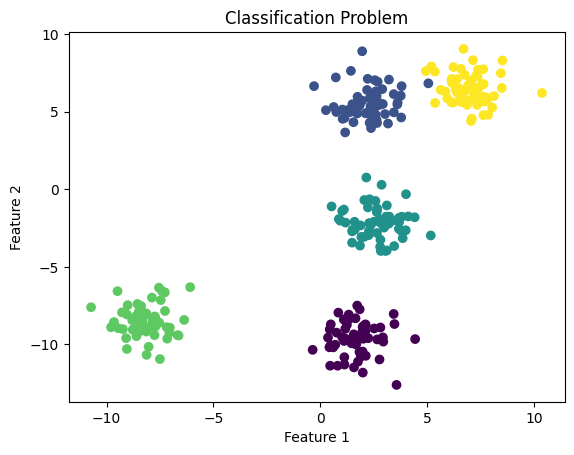

In [7]:
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Problem')
plt.show()

In [8]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

In [9]:
# Create Simple Model

class MyModel(nn.Module): # Name the class
    
    def __init__(self, input_feature, output_feature): # Constructor
        super(MyModel, self).__init__() # Ignore this
        
        # Feeding forward layers
        self.fc1 = nn.Linear(input_feature, 100) # Layer 1 (input)
        self.fc2 = nn.Linear(100, 100) # Layer 2
        self.fc3 = nn.Linear(100, output_feature)  # Layer 3 (output)
        
        # Intermidiate layers
        self.relu = nn.ReLU()  # Activation function
        self.softmax = nn.Softmax() # Output function


    def forward(self, x): # Define how the model forwarding
        
        x = self.fc1(x) # input to layer 1
        x = self.relu(x) # activate output from layer 1
        
        x = self.fc2(x) # feed to layer 2
        x = self.relu(x) # activate output from layer 2
        
        x = self.fc3(x) # feed to layer 3 (output)
        x = self.softmax(x) # activate output from layer 2
        
        return x

In [10]:
# Create the model, loss function, and optimizer

model = MyModel(input_feature=2, output_feature=5) # create model instance

criterion = nn.CrossEntropyLoss()  # Binary Cross-Entropy Loss

optimizer = optim.Adam(model.parameters(), lr=0.001) #  Mathematic model to adjust weight

In [11]:
summary(model, input_size = (2, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]             300
              ReLU-2                  [-1, 100]               0
            Linear-3                  [-1, 100]          10,100
              ReLU-4                  [-1, 100]               0
            Linear-5                    [-1, 5]             505
           Softmax-6                    [-1, 5]               0
Total params: 10,905
Trainable params: 10,905
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [12]:
model = model.to(device) # Move model parameters to specific device

epochs = 300 # declare number of epochs of training

print_interval = 10 # print metric every ... epoch

In [13]:
for epoch in range(epochs): # Looping over epochs

    # Forward pass
    outputs = model(X.to(device)) # feed forward
    loss = criterion(outputs.squeeze(), y.to(device)) # measure loss

    # Backward and optimize
    optimizer.zero_grad() # reset gradients
    loss.backward() # calculate loss
    optimizer.step() # adjust weights

    # print metrics
    if (epoch+1) % print_interval == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/300], Loss: 1.2467
Epoch [20/300], Loss: 1.0942
Epoch [30/300], Loss: 1.0118
Epoch [40/300], Loss: 0.9712
Epoch [50/300], Loss: 0.9526
Epoch [60/300], Loss: 0.9429
Epoch [70/300], Loss: 0.9369
Epoch [80/300], Loss: 0.9328
Epoch [90/300], Loss: 0.9297
Epoch [100/300], Loss: 0.9274
Epoch [110/300], Loss: 0.9257
Epoch [120/300], Loss: 0.9243
Epoch [130/300], Loss: 0.9231
Epoch [140/300], Loss: 0.9222
Epoch [150/300], Loss: 0.9215
Epoch [160/300], Loss: 0.9208
Epoch [170/300], Loss: 0.9202
Epoch [180/300], Loss: 0.9197
Epoch [190/300], Loss: 0.9192
Epoch [200/300], Loss: 0.9187
Epoch [210/300], Loss: 0.9182
Epoch [220/300], Loss: 0.9176
Epoch [230/300], Loss: 0.9170
Epoch [240/300], Loss: 0.9164
Epoch [250/300], Loss: 0.9158
Epoch [260/300], Loss: 0.9151
Epoch [270/300], Loss: 0.9145
Epoch [280/300], Loss: 0.9138
Epoch [290/300], Loss: 0.9132
Epoch [300/300], Loss: 0.9127


In [1]:
# Evaluation

model = model.to('cpu') # Move to model parameters to cpu

with torch.no_grad(): # tell the model that don't calculate gradients
    
    model.eval() # tell the model that this is testing mode (disable dropout etc.)
    
    correct = 0 # init correct testing samples
    total = 0 # init total testing samples
    
    outputs = model(X) # Try feeding forward
    _, predicted = torch.max(outputs.data, 1) # get class_id
    
    #total += y.size(0) # add n of samples
    #correct += (predicted == y).sum().item() # add corrected samples

    #accuracy = 100 * correct / total # calculate acc ratio to percentage
    
    #print('Accuracy of the network on the test set: %d %%' % accuracy)
    

print(classification_report(y, predicted))


NameError: name 'model' is not defined

/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


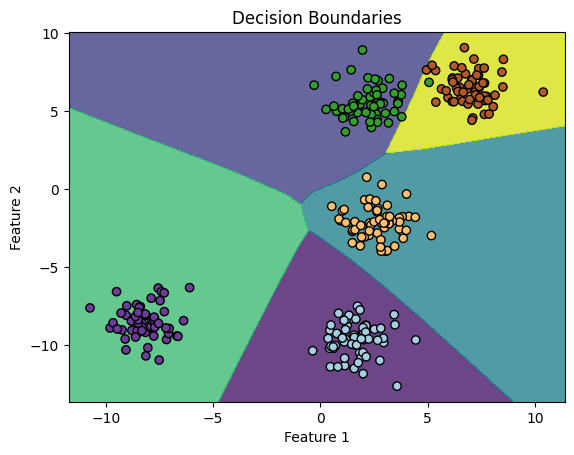

In [15]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


# Convert the meshgrid to a PyTorch tensor
X_grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Make predictions on the meshgrid
with torch.no_grad():
    model.eval()
    Z = model(X_grid)
    _, predicted = torch.max(Z.data, 1)
    Z = predicted.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()

## Other Layer 


### Linear layer

In [17]:
linear_layer = nn.Linear(2, 3)

In [24]:
x = torch.rand(10, 2)
x.shape

torch.Size([10, 2])

In [27]:
h = linear_layer(x)

In [30]:
print(h)
print(h.shape)

tensor([[ 0.2429, -0.5263,  0.6103],
        [ 0.1878, -0.4886,  0.2852],
        [ 0.2909, -0.3434,  0.4529],
        [ 0.3333, -0.1927,  0.3363],
        [ 0.1273, -0.7091,  0.4633],
        [ 0.1767, -0.6316,  0.5274],
        [ 0.2500, -0.5360,  0.6621],
        [ 0.2300, -0.4414,  0.3788],
        [ 0.3071, -0.2795,  0.3956],
        [ 0.2307, -0.5211,  0.5446]], grad_fn=<AddmmBackward0>)
torch.Size([10, 3])


### Convolutional Layer

In [32]:
conv1d_layer = nn.Conv1d(in_channels=2, out_channels=3, kernel_size=3)

In [38]:
x = torch.rand(10, 2, 12)

In [39]:
conv1d_layer(x).shape

torch.Size([10, 3, 10])

In [40]:
x = torch.rand(10, 3, 8, 8)

In [42]:
conv2d_layer = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3)

In [46]:
conv2d_layer(x).shape

torch.Size([10, 5, 3, 3])

In [53]:
conv2d_layer = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, stride=1, padding=2)
conv2d_layer(x).shape

torch.Size([10, 5, 10, 10])

In [70]:
rnn_layer = nn.RNN(input_size=5, hidden_size=3)

In [74]:
x = torch.rand(10, 12, 5)

In [75]:
out, h_n = rnn_layer(x)

In [76]:
out.shape, h_n.shape

(torch.Size([10, 12, 3]), torch.Size([1, 12, 3]))

In [78]:
out.reshape(10, 12*3).shape

torch.Size([10, 36])